In [1]:
import glob
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import matplotlib.pyplot as plt
import os.path

In [2]:
# Conveniently list available tracks to analyze
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split('.npy')[0], available_track_files))
available_track_names

['reInvent2019_track',
 '2022_august_open',
 'Canada_Training',
 'canada_race',
 'Tokyo_Training_track',
 'Oval_track',
 'New_York_Track',
 'Bowtie_track',
 'H_track',
 'reinvent_base',
 '2022_september_open',
 'Mexico_track',
 'Virtual_May19_Train_track',
 'Straight_track',
 'AWS_track',
 'China_track',
 '2022_july_open',
 '2022_june_open',
 'London_Loop_Train']

In [3]:
# Replace the name here with the track to analyze
TRACK_NAME = '2022_september_open'

# Load the center, inner, outer waypoints
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Separate into center, inner, outer waypoints
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

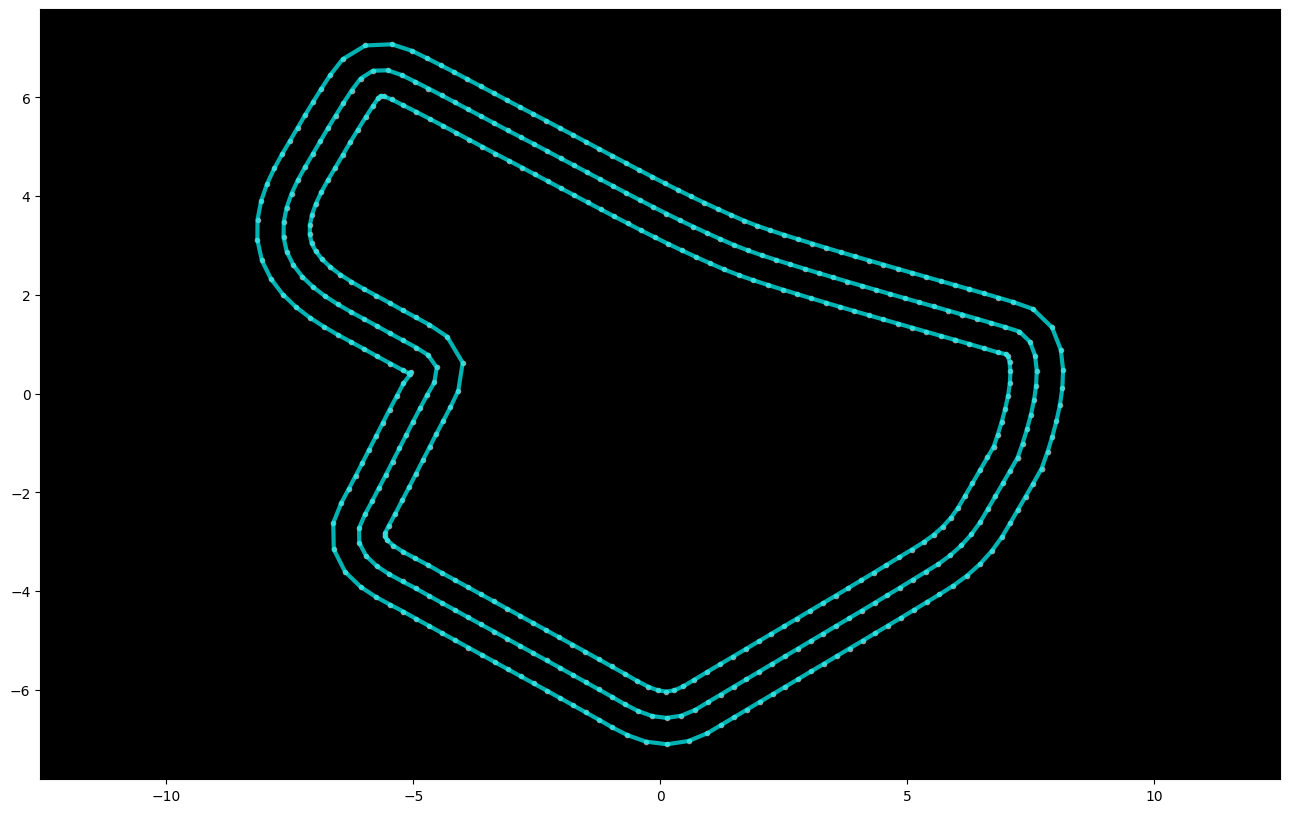

In [4]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

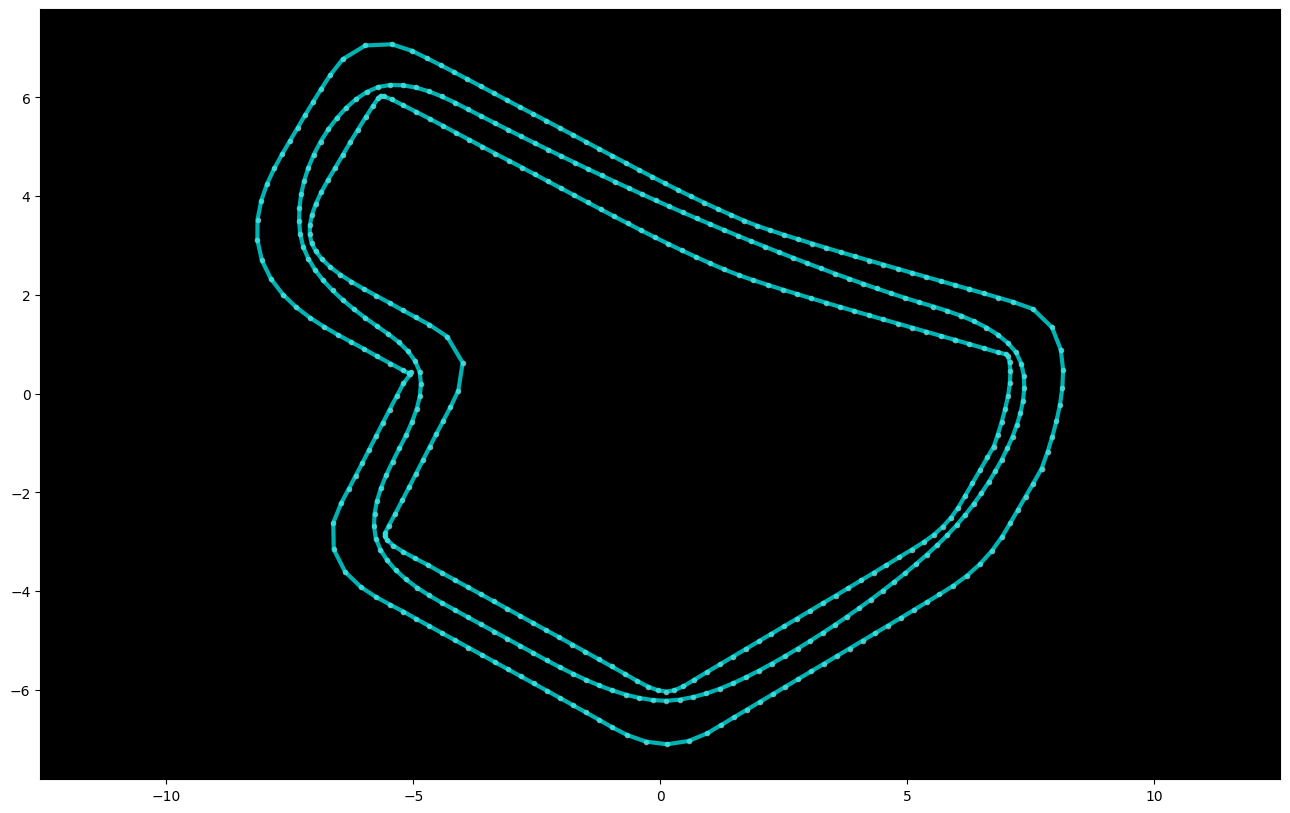

In [5]:
from numpy import array

fname = './racelines/2022_september_open-2000-4-2022-10-23-145109.py'
with open(fname, "r") as file:
    deserialized = eval(file.read())
racing_line = deserialized
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, racing_line, inner_border, outer_border)

In [6]:
# Input 3 coords [[x1,y1],[x2,y2],[x3,y3]]
def circle_radius(coords):

    # Flatten the list and assign to variables
    x1, y1, x2, y2, x3, y3 = [i for sub in coords for i in sub]

    a = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    b = (x1**2+y1**2)*(y3-y2) + (x2**2+y2**2)*(y1-y3) + (x3**2+y3**2)*(y2-y1)
    c = (x1**2+y1**2)*(x2-x3) + (x2**2+y2**2)*(x3-x1) + (x3**2+y3**2)*(x1-x2)
    d = (x1**2+y1**2)*(x3*y2-x2*y3) + (x2**2+y2**2) * \
        (x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1-x1*y2)

    # In case a is zero (so radius is infinity)
    try:
        r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5
    except:
        r = 999

    return r

In [7]:
npoints = len(racing_line) - 1
turning_radii = np.zeros(npoints)
for i in range(npoints):
    nxt = (i + 1) % npoints
    prv = (i - 1) % npoints
    turning_radii[i] = circle_radius([racing_line[prv], racing_line[i], racing_line[nxt]])

In [8]:
turning_radii

array([5.52460958e+00, 8.52038735e+00, 1.46008016e+01, 1.96462008e+01,
       2.41791309e+01, 2.92115077e+01, 3.41590376e+01, 3.88597277e+01,
       4.33865907e+01, 4.62204490e+01, 5.25124412e+01, 5.63829436e+01,
       5.78603219e+01, 5.86322359e+01, 5.87385344e+01, 5.81993700e+01,
       5.72058169e+01, 5.60922651e+01, 5.52201118e+01, 5.48624292e+01,
       5.51395869e+01, 5.60838498e+01, 5.77337025e+01, 6.01721663e+01,
       6.35671305e+01, 6.81673449e+01, 7.42505969e+01, 8.14161789e+01,
       8.71083026e+01, 9.00209188e+01, 8.92640956e+01, 8.47052275e+01,
       7.77208304e+01, 7.24350384e+01, 6.93636459e+01, 5.64529231e+01,
       4.36591412e+01, 8.62527335e+00, 4.67799243e+00, 3.15259077e+00,
       2.30781147e+00, 1.80116397e+00, 1.30002830e+00, 1.01643226e+00,
       1.48262250e+00, 1.93528883e+00, 2.46454239e+00, 3.23218905e+00,
       3.39421770e+00, 3.53032647e+00, 3.41391771e+00, 3.27984548e+00,
       3.13693809e+00, 2.98469441e+00, 2.74067953e+00, 2.28901610e+00,
      

In [9]:
def plot_track(ax):
    ax.plot(inner_border[:, 0], inner_border[:, 1], '.', color='#646464', zorder=1)
    ax.plot(outer_border[:, 0], outer_border[:, 1], '.', color='#646464', zorder=1)
    ax.plot(inner_border[:, 0], inner_border[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    ax.plot(outer_border[:, 0], outer_border[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

In [10]:
MAX_SPEED = 1.0
MIN_SPEED = 0.5
LOOKAHEAD = 5

c = MIN_SPEED / np.sqrt(np.amin(turning_radii))
# c = 1.5

optimal_speeds = c * np.sqrt(turning_radii)
final_optimal_speeds = np.zeros(npoints)
for i in range(npoints):
    next_close = (i + 1) % npoints
    next_far = (i + 1 + LOOKAHEAD) % npoints
    if next_far > next_close:
        final_optimal_speeds[i] = np.amin(optimal_speeds[next_close:next_far])
    else:
        final_optimal_speeds[i] = np.amin(np.concatenate((optimal_speeds[next_close:], optimal_speeds[:next_far])))
final_optimal_speeds = np.maximum(np.minimum(final_optimal_speeds, MAX_SPEED), MIN_SPEED)

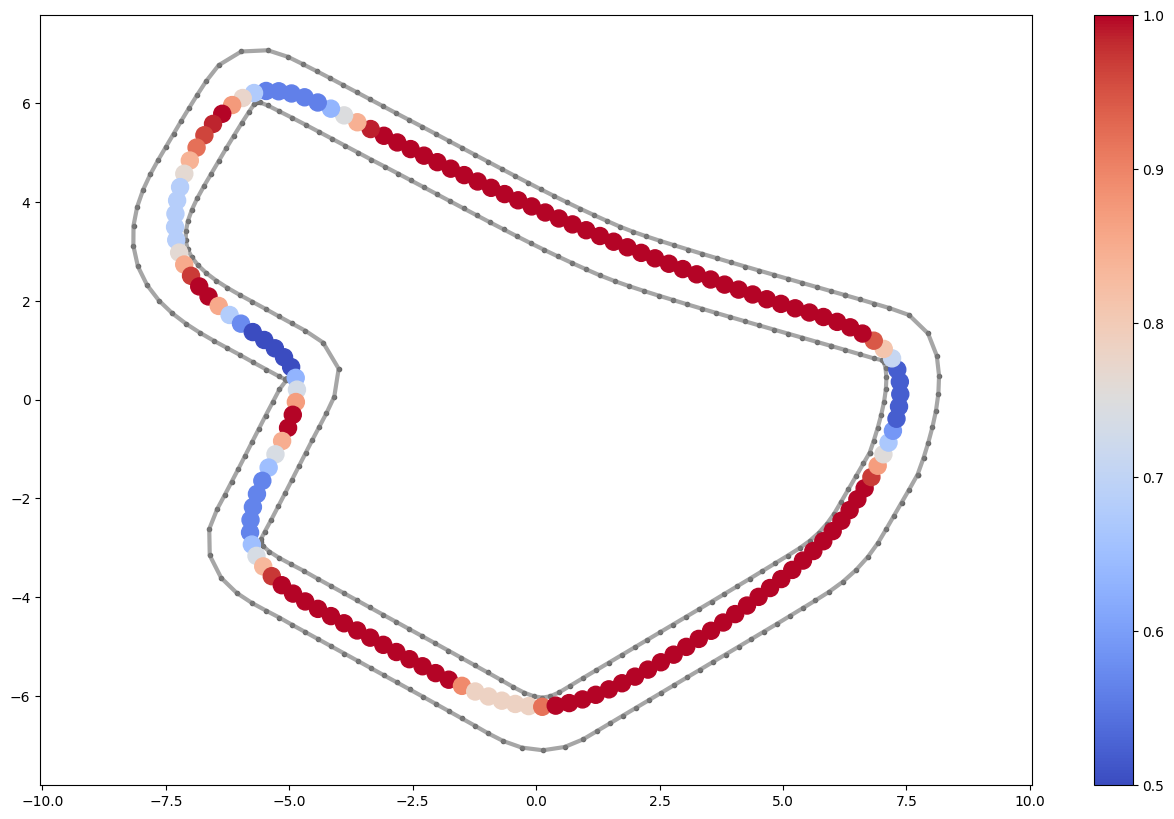

In [11]:
fig = plt.figure(2, figsize=(16, 10))
ax = fig.add_subplot(111)
plt.axis('equal')
plot_track(ax)
scatter = ax.scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=final_optimal_speeds, cmap='coolwarm', zorder=3
)
fig.colorbar(scatter)

In [12]:
from datetime import datetime

now = datetime.now()
prefix = './speeds/%s-%d-%d-%s' % (TRACK_NAME, c, LOOKAHEAD, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(final_optimal_speeds))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, final_optimal_speeds)

Writing python code to ./speeds/2022_september_open-0-5-2022-10-23-150151.py
Writing numpy binary to ./speeds/2022_september_open-0-5-2022-10-23-150151.npy


In [13]:
from datetime import datetime

now = datetime.now()
prefix = './inner-borders/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(inner_border))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, inner_border)

Writing python code to ./inner-borders/2022_september_open-2022-10-23-150153.py
Writing numpy binary to ./inner-borders/2022_september_open-2022-10-23-150153.npy


In [14]:
from datetime import datetime

now = datetime.now()
prefix = './outer-borders/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(outer_border))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, outer_border)

Writing python code to ./outer-borders/2022_september_open-2022-10-23-150154.py
Writing numpy binary to ./outer-borders/2022_september_open-2022-10-23-150154.npy
